# Assignnment 10

## Question 1

In [1]:
import sqlite3
import pandas as pd


conn = sqlite3.connect("database.sqlite") 

query = """
SELECT EmployeeName, JobTitle, TotalPayBenefits
FROM Salaries
ORDER BY TotalPayBenefits DESC
LIMIT 10;
"""

top_10_paid = pd.read_sql_query(query, conn)


print(top_10_paid)


           EmployeeName                                        JobTitle  \
0        NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1          GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2           David Shinn                                  Deputy Chief 3   
3            Amy P Hart                               Asst Med Examiner   
4  William J Coaker Jr.                        Chief Investment Officer   
5        Gregory P Suhr                                 Chief of Police   
6  Joanne M Hayes-White                          Chief, Fire Department   
7        Gregory P Suhr                                 Chief of Police   
8  Joanne M Hayes-White                          Chief, Fire Department   
9       Ellen G Moffatt                               Asst Med Examiner   

   TotalPayBenefits  
0         567595.43  
1         538909.28  
2         510732.68  
3         479652.21  
4         436224.36  
5         425815.28  
6         422353.40 

## Question 2

In [2]:

query = """
SELECT Year, COUNT(*) as MissingCount
FROM Salaries
WHERE EmployeeName = 'Not Provided' OR EmployeeName = 'Not provided'
GROUP BY Year
ORDER BY Year;
"""

missing_data_years = pd.read_sql_query(query, conn)

# Display the result
print(missing_data_years)


   Year  MissingCount
0  2011             1
1  2012             1
2  2014             4


## Question 3

In [4]:

query = """
SELECT COUNT(DISTINCT Agency) AS UniqueAgencyCount
FROM Salaries;
"""

unique_agencies = pd.read_sql_query(query, conn)


print(unique_agencies)


   UniqueAgencyCount
0                  1


## Question 4

In [6]:
query = """
SELECT 
    AVG(BasePay) AS AvgBasePay,
    AVG(OvertimePay) AS AvgOvertimePay,
    AVG(TotalPay) AS AvgTotalPay
FROM Salaries
WHERE Year = 2011;
"""

result = pd.read_sql_query(query, conn)
print(result)


     AvgBasePay  AvgOvertimePay   AvgTotalPay
0  63595.956517     4531.065429  71744.103871


## Question 5

                    JobTitle   TotalPaySum
0           Transit Operator  1.520080e+08
1           Registered Nurse  1.444065e+08
2                Firefighter  1.132836e+08
3           Police Officer 3  1.065347e+08
4             Deputy Sheriff  7.108394e+07
5                 Sergeant 3  6.084374e+07
6  Attorney (Civil/Criminal)  5.312390e+07
7             Police Officer  5.132217e+07
8              Special Nurse  4.949874e+07
9           Police Officer 2  4.631872e+07


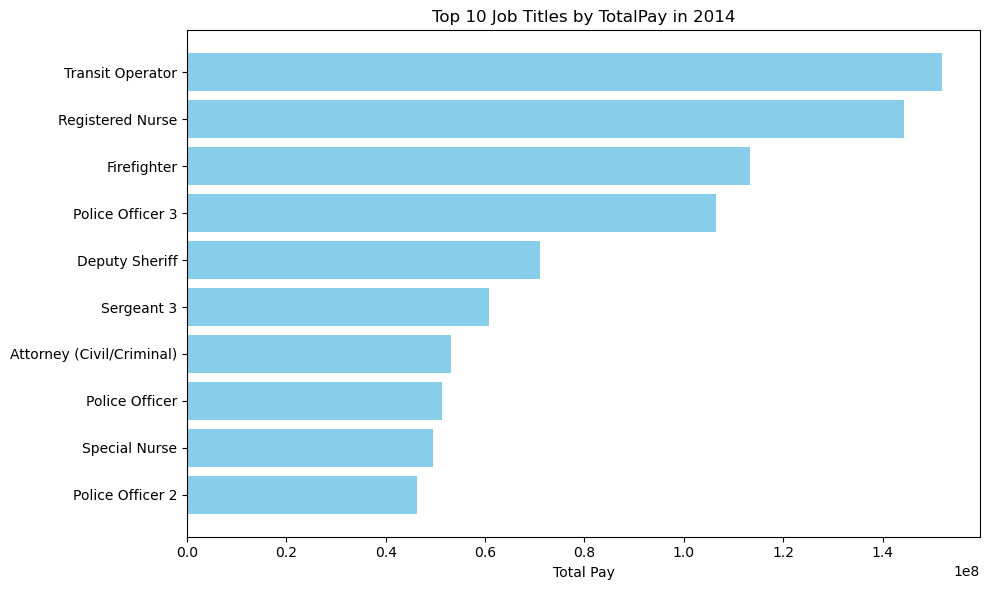

In [7]:
# Step 1: SQL query to get top 10 job titles by TotalPay in 2014
query = """
SELECT JobTitle, SUM(TotalPay) AS TotalPaySum
FROM Salaries
WHERE Year = 2014
GROUP BY JobTitle
ORDER BY TotalPaySum DESC
LIMIT 10;
"""

# Step 2: Run the query
top_jobs_2014 = pd.read_sql_query(query, conn)
print(top_jobs_2014)

# Step 3: Plot the result
import matplotlib.pyplot as plt

# Sort for better horizontal plot
top_jobs_2014 = top_jobs_2014.sort_values(by="TotalPaySum")

plt.figure(figsize=(10, 6))
plt.barh(top_jobs_2014["JobTitle"], top_jobs_2014["TotalPaySum"], color="skyblue")
plt.xlabel("Total Pay")
plt.title("Top 10 Job Titles by TotalPay in 2014")
plt.tight_layout()
plt.show()


## Question 6

In [8]:
query = """
SELECT DISTINCT JobTitle, OvertimePay
FROM Salaries
WHERE OvertimePay > 150000
  AND EmployeeName NOT IN ('Not Provided', 'Not provided')
ORDER BY OvertimePay DESC;
"""

high_overtime = pd.read_sql_query(query, conn)
print(high_overtime)


                          JobTitle  OvertimePay
0  CAPTAIN III (POLICE DEPARTMENT)    245131.88
1     Lieutenant, Fire Suppression    220909.48
2                   Deputy Sheriff    196689.18
3        EMT/Paramedic/Firefighter    192424.49
4                   Deputy Sheriff    173547.73
5                   Deputy Sheriff    173178.23
6                   Deputy Sheriff    169659.92
7     Lieutenant, Fire Suppression    163477.81
8                      Firefighter    160418.47
9                   Deputy Sheriff    156077.49


## Question 7

In [9]:
query = """
SELECT EmployeeName, JobTitle, TotalPay
FROM Salaries
WHERE JobTitle LIKE '%CHIEF%';
"""

chief_employees = pd.read_sql_query(query, conn)
print(chief_employees)


            EmployeeName                                      JobTitle  \
0        PATRICK GARDNER  DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   
1         DAVID SULLIVAN                     ASSISTANT DEPUTY CHIEF II   
2              ALSON LEE            BATTALION CHIEF, (FIRE DEPARTMENT)   
3         MICHAEL MORRIS            BATTALION CHIEF, (FIRE DEPARTMENT)   
4     JOANNE HAYES-WHITE        CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)   
..                   ...                                           ...   
622     Sharon C Jackson                Chief Deputy Adlt Probation Of   
623          Anita S Lee                                   Chief Clerk   
624     George D Vaughan                      Chief Nursery Specialist   
625  Patrick W Gillespie                              Chief Preparator   
626  Christopher L Ochoa                     Chief Stationary Engineer   

      TotalPay  
0    326373.19  
1    316285.74  
2    315981.05  
3    303427.55  
4    302377.73  
..       

## Question 8

In [10]:
query = """
SELECT Year, 
       COUNT(*) AS EngineerCount
FROM Salaries
WHERE (JobTitle LIKE '%ENGINEER%' OR JobTitle LIKE '%Fire%')
  AND Year IN (2012, 2013)
GROUP BY Year
ORDER BY Year;
"""

engineer_fire_counts = pd.read_sql_query(query, conn)
print(engineer_fire_counts)


   Year  EngineerCount
0  2012           2463
1  2013           2506


## Question 9

In [11]:
query = """
SELECT DISTINCT JobTitle
FROM Salaries
WHERE JobTitle LIKE 'CAPTAIN%';
"""

captain_titles = pd.read_sql_query(query, conn)
print(captain_titles)


                                            JobTitle
0                    CAPTAIN III (POLICE DEPARTMENT)
1              CAPTAIN, EMERGENCYCY MEDICAL SERVICES
2                          CAPTAIN, FIRE SUPPRESSION
3  CAPTAIN, BUREAU OF FIRE PREVENTION AND PUBLIC ...
4                                          Captain 3
5                          Captain, Fire Suppression
6                        Captain, Emergency Med Svcs
7                         Captain, (Fire Department)


## Question 10

In [12]:
query = """
SELECT EmployeeName, JobTitle, BasePay, TotalPay
FROM Salaries
WHERE BasePay > 50000
  AND TotalPay < 150000
  AND EmployeeName NOT IN ('Not Provided', 'Not provided');
"""

filtered_employees = pd.read_sql_query(query, conn)
print(filtered_employees)


               EmployeeName                                      JobTitle  \
0                 JAY DOWKE                            POLICE OFFICER III   
1               MURRAY BOND  MANAGER VI - MUNICIPAL TRANSPORTATION AGENCY   
2               MARILOU GAN                              REGISTERED NURSE   
3             BRIAN COLLINS                                   FIREFIGHTER   
4              GREGORY NEAL                              POLICE OFFICER I   
...                     ...                                           ...   
87253         Renee J Allen                                 Special Nurse   
87254  Melody M Butterworth                     Attorney (Civil/Criminal)   
87255       Stephanie Reidy                                 Special Nurse   
87256        Paul E Maltzer                                     Planner 5   
87257     Kathleen N Yumang                                 Special Nurse   

         BasePay   TotalPay  
0      112380.37  149987.24  
1       149975.